## Supplement 7: Unsupervised Learning

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from skimage import io
import matplotlib.pyplot as plt

### 7.3 Programming Task: Color Quantization using K-Means clustering.

 The goal of this task is to perform color quantization using the K-Means clustering algorithm.

   i\. Implement the K-Means clustering algorithm using Numpy/SciPy.




In [2]:
cluster_1 = np.random.normal((0, 1), 1, (100, 2))
cluster_2 = np.random.normal((10, 20), 3, (100, 2))
data = np.r_[cluster_1, cluster_2]
data.shape

(200, 2)

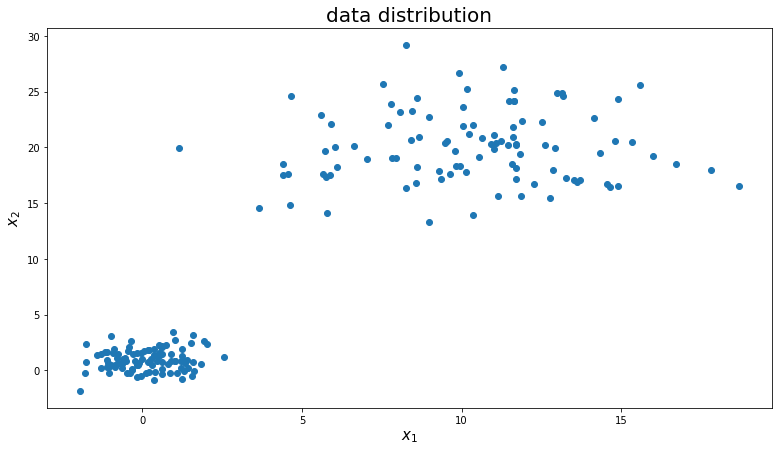

In [3]:
plt.figure(figsize=(13, 7))
plt.scatter(data[:, 0], data[:, 1])
plt.title('data distribution', fontsize=20)
plt.xlabel('$x_1$', fontsize=15)
plt.ylabel('$x_2$', fontsize=15)
plt.show()

In [4]:
def K_means_clustering(train_X, n_clusters):
    centers = np.random.uniform(low=train_X.min(axis=0), high=train_X.max(axis=0), size=(n_clusters, train_X.shape[1]))
    labels = np.empty(train_X.shape[0])
    while True:
        dists_squared = (np.sum(train_X ** 2, axis=1).reshape(-1, 1) 
                         - 2 * np.dot(train_X, centers.T) 
                         + np.sum(centers ** 2, axis=1))
        labels = dists_squared.argmin(axis=1)
        new_centers = centers.copy()
        for label in range(n_clusters):
            if train_X[labels == label].size:
                new_centers[label] = train_X[labels == label].mean(axis=0)
        if np.array_equal(new_centers, centers):
            break
        else:
            centers = new_centers
    return labels, centers

In [5]:
labels, centers = K_means_clustering(data, 2)

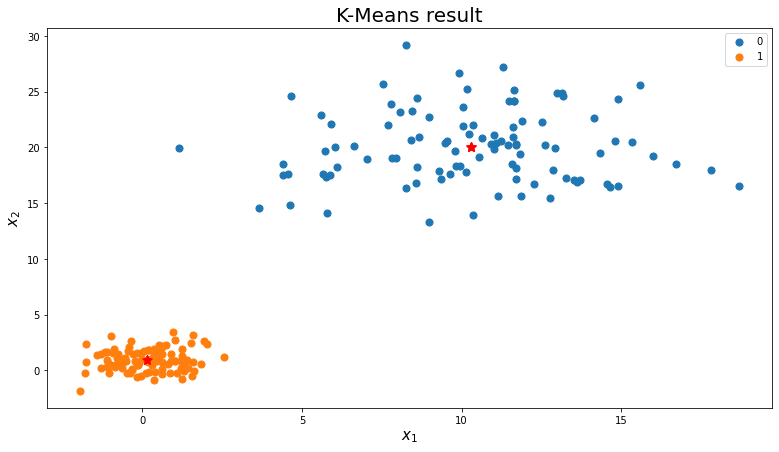

In [6]:
u_labels = np.unique(labels)
plt.figure(figsize=(13, 7))
#plotting the results:
for i in u_labels:
    plt.scatter(data[labels == i, 0] , data[labels == i, 1] , label=i, s=50)
    plt.scatter(centers[:, 0], centers[:, 1], color="red", marker=(5, 1), s=100)
plt.title('K-Means result', fontsize=20)
plt.xlabel('$x_1$', fontsize=15)
plt.ylabel('$x_2$', fontsize=15)
plt.legend()
plt.show()

   ii\. Read the given image. Consider each pixel as a 3-dimensional vector and run your K-Means clustering algorithm to get 64 clusters.


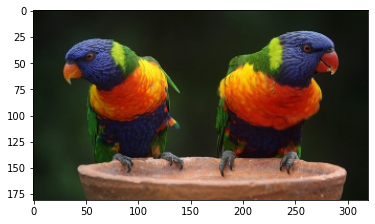

(181, 320, 3)


In [7]:
#TODO
image = io.imread('sup_7_3_input.jpg')
plt.imshow(image)
plt.show()
print(image.shape)

In [8]:
reshaped_image = image.reshape(-1, 3)
labels, centers = K_means_clustering(reshaped_image, 64)

  iii\. Assign each pixel the color value of its nearest cluster center. Visualize the result.

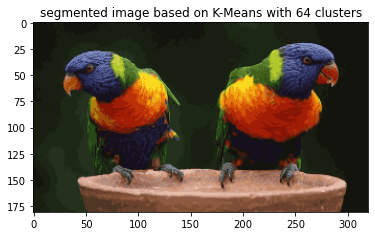

In [9]:
centers = np.uint8(centers)
segmented_data = centers[labels]
segmented_image = segmented_data.reshape((image.shape))
plt.imshow(segmented_image)
plt.title('segmented image based on K-Means with 64 clusters')
plt.show()

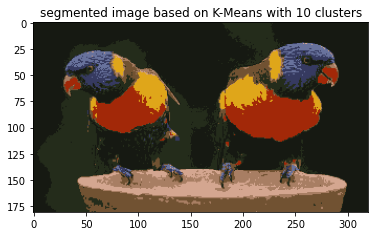

In [10]:
labels, centers = K_means_clustering(reshaped_image, 10)
centers = np.uint8(centers)
segmented_data = centers[labels]
segmented_image = segmented_data.reshape((image.shape))
plt.imshow(segmented_image)
plt.title('segmented image based on K-Means with 10 clusters')
plt.show()